## 1. 问题描述
本次作业中，自行选择2个数据集进行探索性分析与预处理。

## 2. 数据集
可选数据集包括：

- GitHub Dataset
- MovieLens 10M Dataset
- Alzheimer Disease and Healthy Aging Data in US
- Movies Dataset from Pirated Sites
- VitalDB
- Tweet Sentiment's Impact on Stock Returns
## 3. 数据分析要求
### 3.1 数据摘要和可视化
- 数据摘要
      标称属性，给出每个可能取值的频数

      数值属性，给出5数概括及缺失值的个数

- 数据可视化
      使用直方图、盒图等检查数据分布及离群点

### 3.2 数据缺失的处理
观察数据集中缺失数据，分析其缺失的原因。分别使用下列四种策略对缺失值进行处理:

- 将缺失部分剔除
- 用最高频率值来填补缺失值
- 通过属性的相关关系来填补缺失值
- 通过数据对象之间的相似性来填补缺失值
注意：在处理后完成，要对比新旧数据集的差异。

## 4. 提交内容
- 分析过程报告（PDF格式）
- 程序所在代码仓库地址（使用Github或码云），仓库中应包含完整的处理数据的代码和使用说明
- 所选择的数据集在仓库的README文件中说明
- 相关的数据文件不要上传到代码仓库中
- 建议：使用Jupyter Notebook将分析报告和代码组织在一起，使用Notebook的导出功能将报告导出为PDF格式的文件上传到乐学。



## Github Dataset 数据集

In [6]:
import numpy as np 
import pandas as pd #调用numpy和pandas库 读取数据

# Load data set.
github_data = pd.read_csv('/Users/lansemenghuan/data mining homework/github_dataset.csv')

# Check the columns.
github_data.columns

Index(['repositories', 'stars_count', 'forks_count', 'issues_count',
       'pull_requests', 'contributors', 'language'],
      dtype='object')

In [7]:
github_data.head() 

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language
0,octocat/Hello-World,0,0,612,316,2,NaN
1,EddieHubCommunity/support,271,150,536,6,71,NaN
2,ethereum/aleth,0,0,313,27,154,C++
3,localstack/localstack,0,0,290,30,434,Python
4,education/classroom,0,589,202,22,67,Ruby


可以看出，需要进行处理的数据为'stars_count', 'forks_count', 'issues_count',
       'pull_requests', 'contributors'五种

## 数据标数属性 和 数值属性

In [11]:
github_data['repositories'].value_counts()

iamshaunjp/complete-mongodb         2
ritwickdey/ritwickdey.github.io     2
artkirienko/int-null-even           2
lengstrom/Dangerous-Chef-Pioneer    2
carloscuesta/starterkit             2
                                   ..
RioChndr/algorithm_challenge        1
donnemartin/gitsome                 1
ethereum/beacon_chain               1
Clueless-Community/collegeAPI       1
lynxerzhang/AS3Util                 1
Name: repositories, Length: 972, dtype: int64

In [20]:
sc_c = github_data['stars_count'].value_counts()  # 标数属性
sc_d = github_data['stars_count'].describe() #数值属性
sc_c,sc_d

(0      225
 1       59
 2       49
 5       32
 3       31
       ... 
 220      1
 218      1
 79       1
 86       1
 217      1
 Name: stars_count, Length: 249, dtype: int64,
 count    1052.000000
 mean       81.976236
 std       170.403116
 min         0.000000
 25%         1.000000
 50%        12.000000
 75%        65.250000
 max       995.000000
 Name: stars_count, dtype: float64)

In [21]:
fc_c = github_data['forks_count'].value_counts()
fc_d = github_data['forks_count'].describe() 
fc_c,fc_d

(0      260
 1      101
 2       58
 3       36
 4       30
       ... 
 67       1
 176      1
 174      1
 169      1
 973      1
 Name: forks_count, Length: 200, dtype: int64,
 count    1052.000000
 mean       53.884981
 std       127.699729
 min         0.000000
 25%         1.000000
 50%         6.000000
 75%        38.250000
 max       973.000000
 Name: forks_count, dtype: float64)

In [22]:
ic_c = github_data['issues_count'].value_counts()
ic_d = github_data['issues_count'].describe() 
ic_c,ic_d

(1      416
 2      164
 3       96
 4       60
 5       41
       ... 
 42       1
 41       1
 39       1
 30       1
 612      1
 Name: issues_count, Length: 66, dtype: int64,
 count    1052.000000
 mean        8.656844
 std        32.445154
 min         1.000000
 25%         1.000000
 50%         2.000000
 75%         6.000000
 max       612.000000
 Name: issues_count, dtype: float64)

In [23]:
pr_c = github_data['pull_requests'].value_counts()
pr_d = github_data['pull_requests'].describe() 
pr_c,pr_d

(0      617
 1      152
 2       58
 3       43
 7       21
 6       19
 4       18
 5       18
 9       12
 10       9
 8        9
 11       8
 18       8
 12       6
 14       6
 16       5
 22       4
 21       4
 19       3
 13       3
 15       3
 159      2
 27       2
 36       2
 31       2
 29       2
 20       2
 25       2
 30       1
 24       1
 32       1
 23       1
 60       1
 125      1
 17       1
 164      1
 235      1
 316      1
 484      1
 567      1
 Name: pull_requests, dtype: int64,
 count    1052.000000
 mean        4.374525
 std        27.913732
 min         0.000000
 25%         0.000000
 50%         0.000000
 75%         2.000000
 max       567.000000
 Name: pull_requests, dtype: float64)

In [24]:
c_c = github_data['contributors'].value_counts()
c_d = github_data['contributors'].describe() 
c_c,c_d

(0      502
 2      175
 3       83
 4       38
 5       35
       ... 
 47       1
 45       1
 44       1
 42       1
 658      1
 Name: contributors, Length: 67, dtype: int64,
 count    1052.000000
 mean        8.364068
 std        37.511807
 min         0.000000
 25%         0.000000
 50%         2.000000
 75%         4.000000
 max       658.000000
 Name: contributors, dtype: float64)

In [30]:
l_c = github_data['language'].value_counts()
l_c

JavaScript          253
Python              155
HTML                 72
Java                 44
TypeScript           37
CSS                  37
Dart                 36
C++                  29
Jupyter Notebook     29
Ruby                 28
C                    26
Shell                25
PHP                  16
Go                   15
Rust                 10
Swift                10
C#                    8
Objective-C           8
Kotlin                7
Makefile              6
Jinja                 5
SCSS                  4
Perl                  3
CoffeeScript          3
AutoHotkey            3
Solidity              3
Dockerfile            3
Pawn                  2
CodeQL                2
PowerShell            2
Hack                  2
Vue                   2
Vim Script            2
Assembly              2
Elixir                2
HCL                   1
Gherkin               1
QML                   1
ActionScript          1
Haskell               1
QMake                 1
Svelte          

In [27]:
NaN_counts = github_data.isna().sum()
NaN_counts = pd.DataFrame(NaN_counts, columns=['NaN_counts']).T # 缺失数据
NaN_counts

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language
NaN_counts,0,0,0,0,0,0,145


## 数据可视化

<BarContainer object of 51 artists>

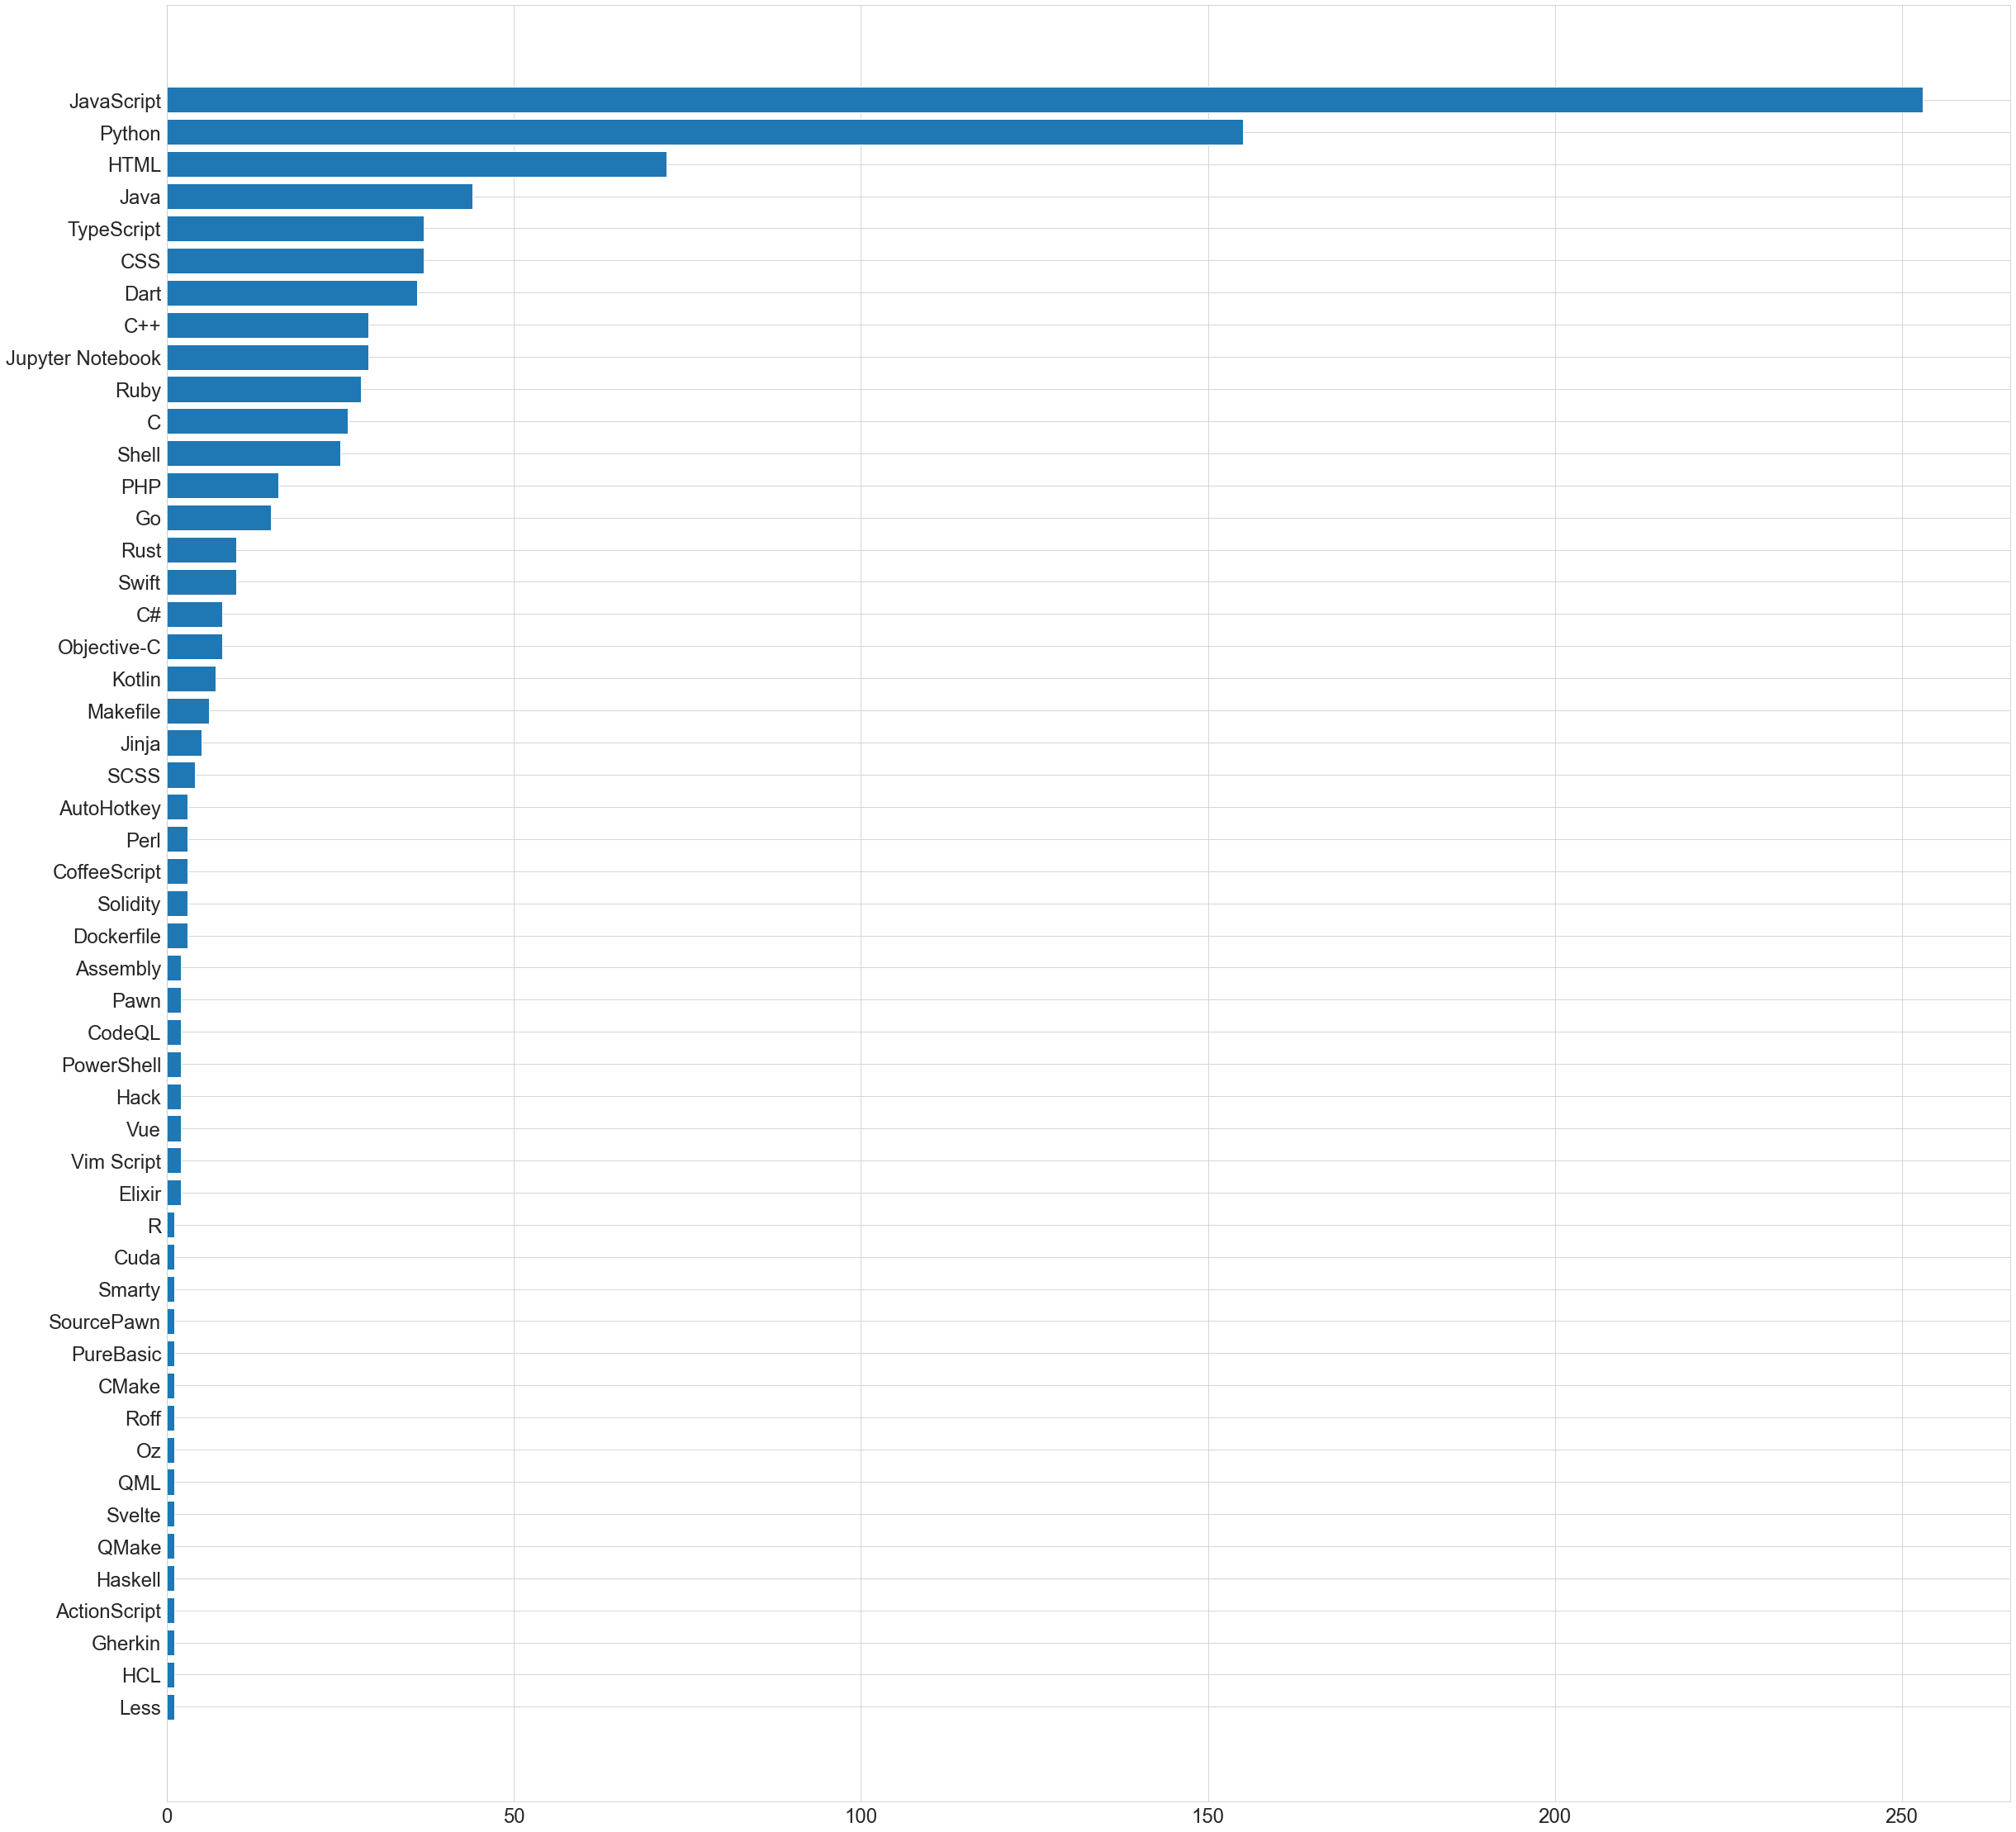

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
language_counts = pd.DataFrame(l_c).sort_values(by='language', ascending=True).rename(columns={'language': 'language_count'})
plt.figure(figsize=(40, 40))
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.barh(language_counts.index, width=language_counts['language_count'])

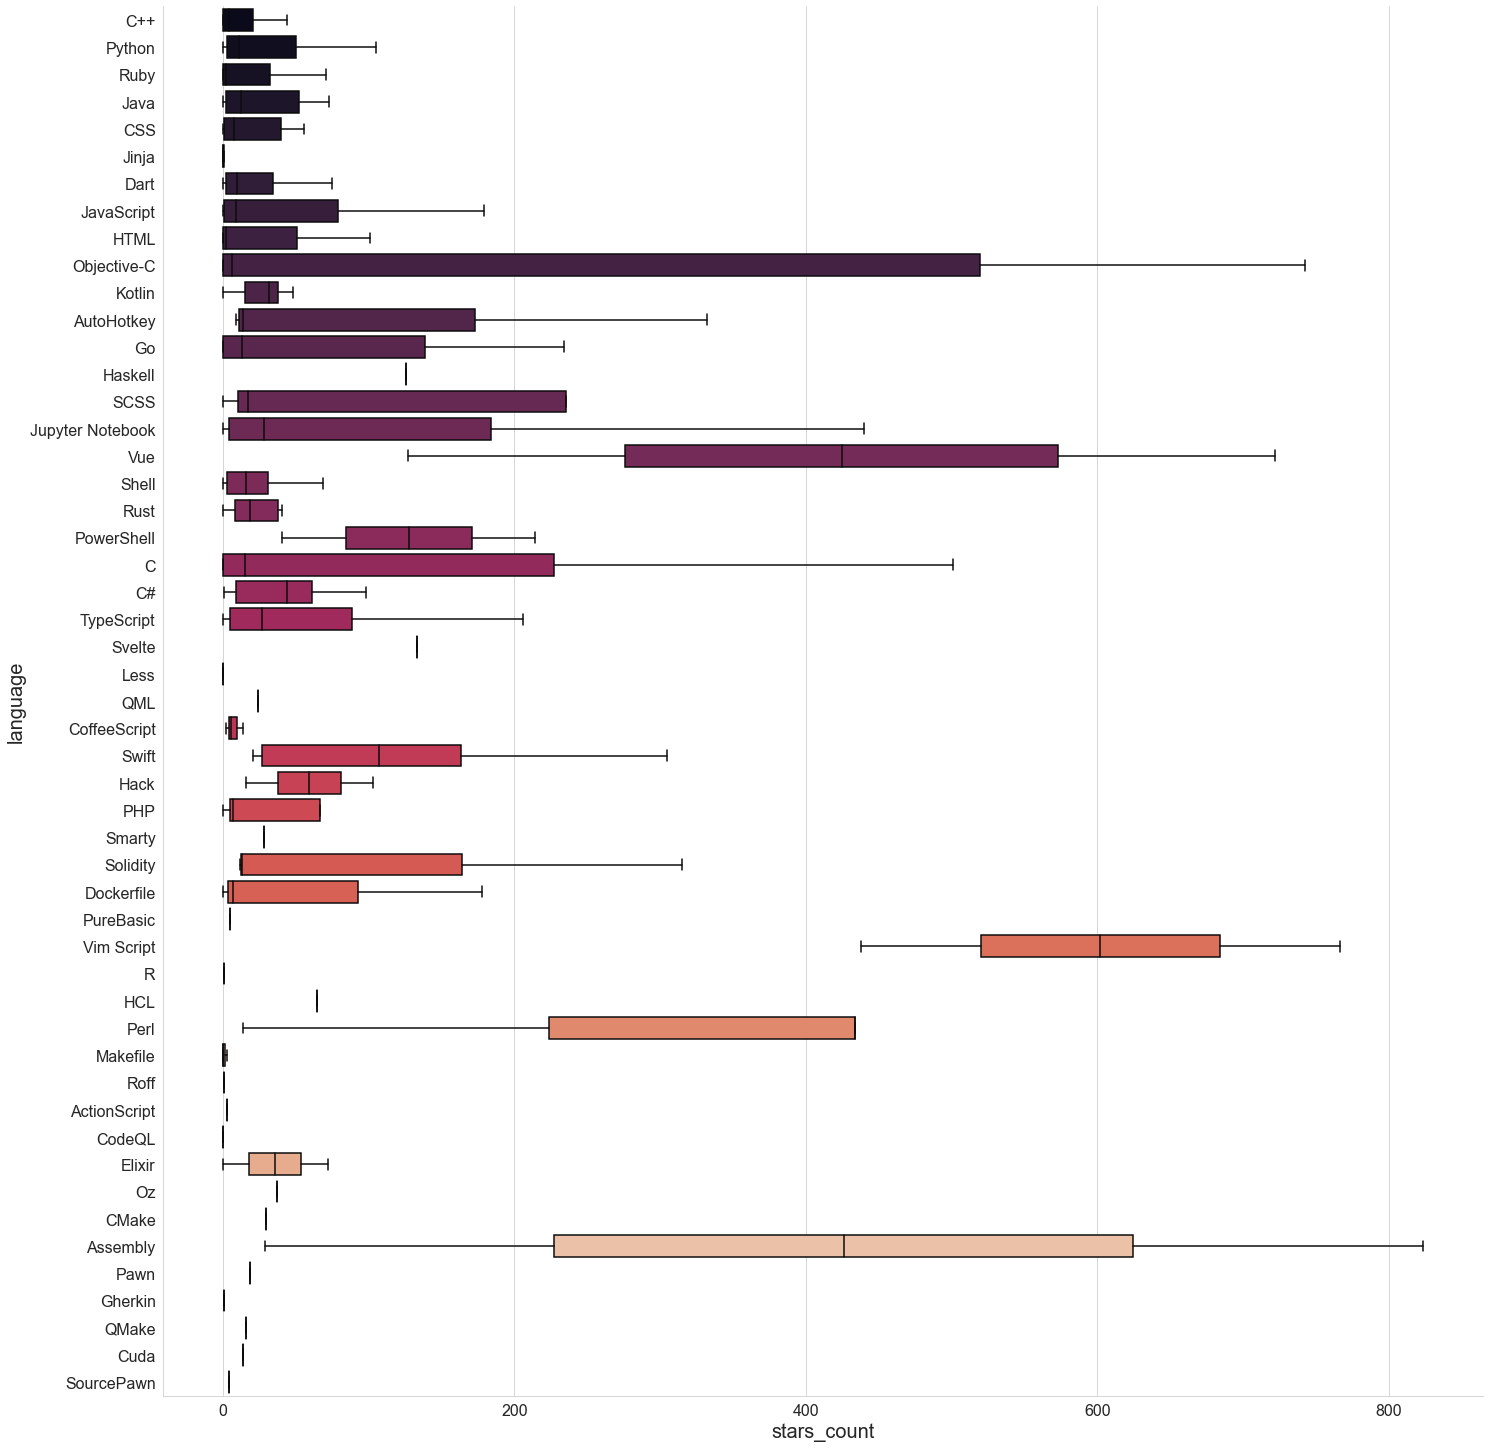

In [32]:
sns.set_style("whitegrid")
stars_count_box = sns.catplot(data=github_data, kind='box', y='language', x='stars_count', height=20, palette='rocket', sym='')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('language', fontsize=20, )
plt.xlabel('stars_count', fontsize=20)
plt.show()

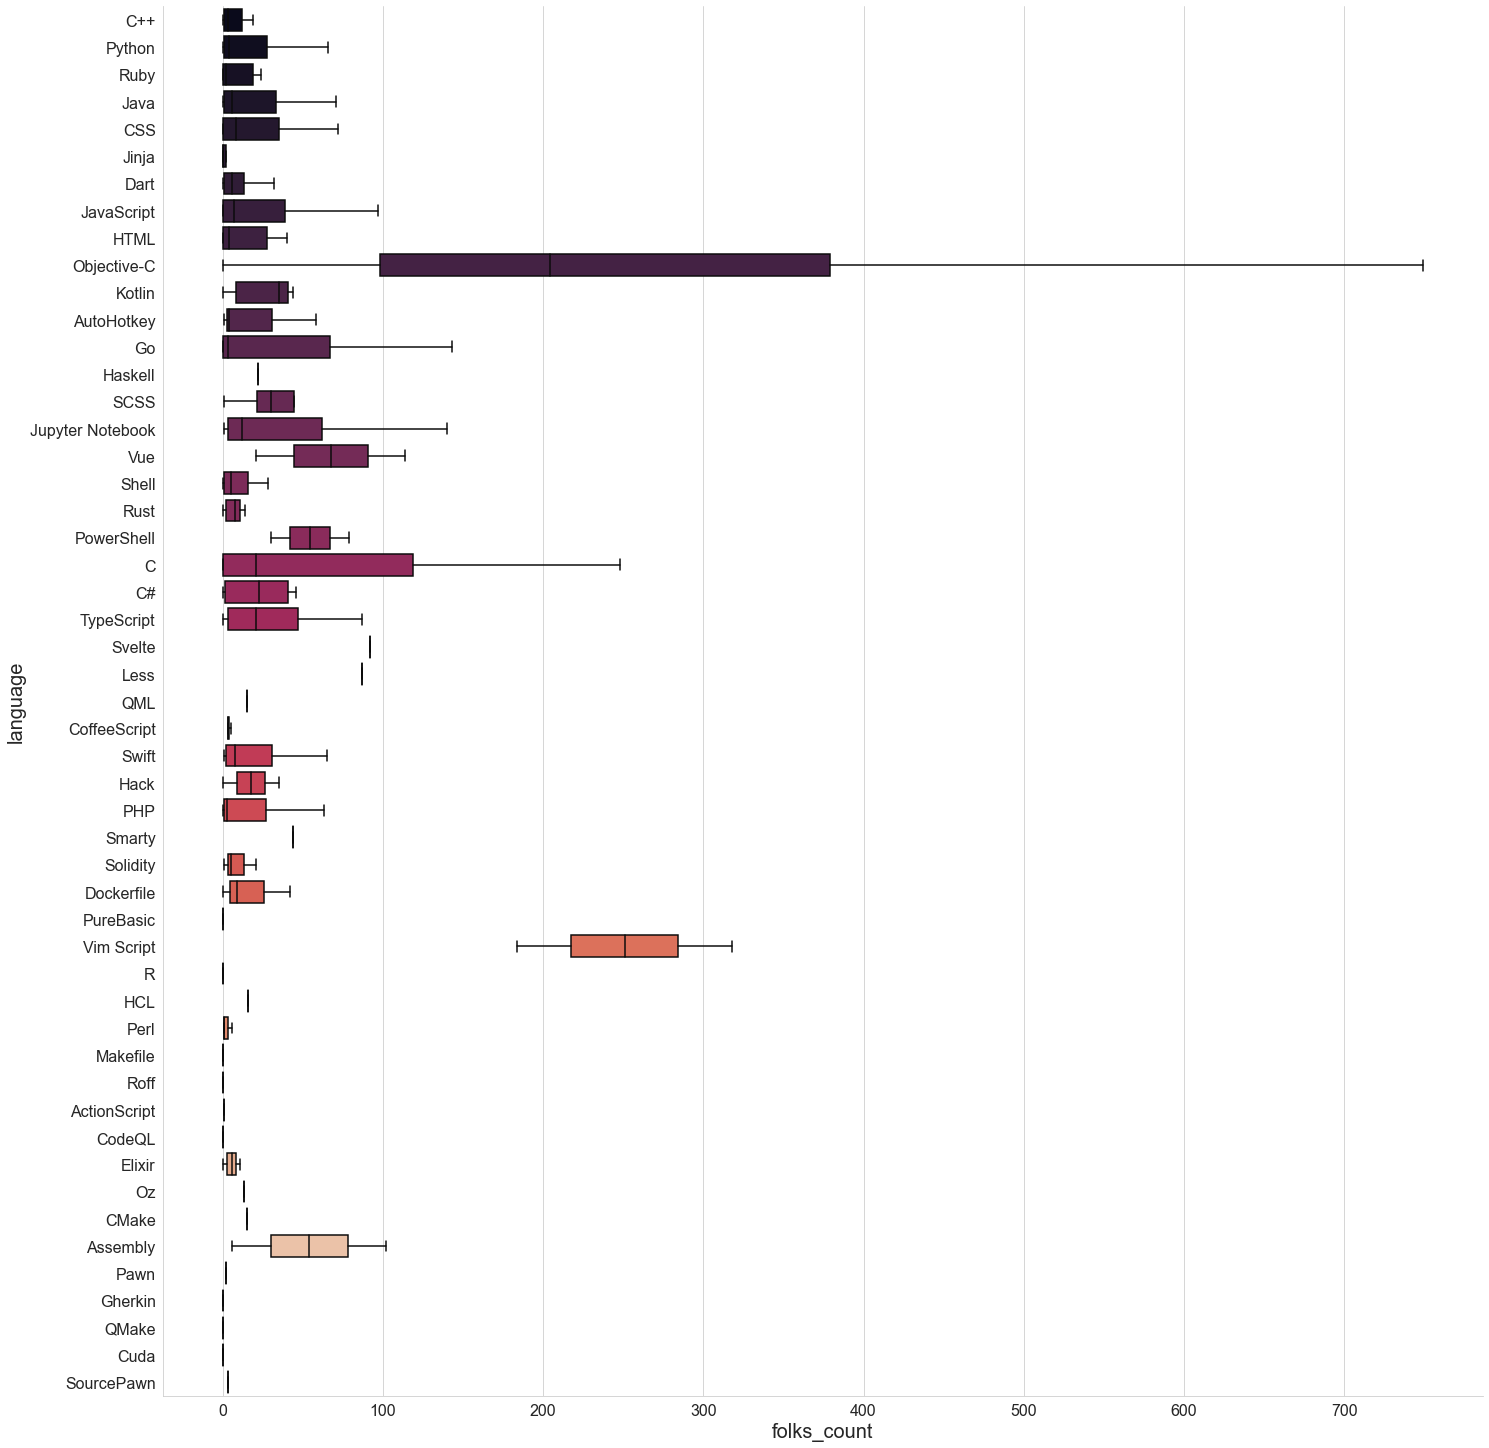

In [49]:
sns.set_style("whitegrid")
forks_count_box = sns.catplot(data=github_data, kind='box', y='language', x='forks_count', height=20, palette='rocket', sym='')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('language', fontsize=20, )
plt.xlabel('folks_count', fontsize=20)
plt.show()

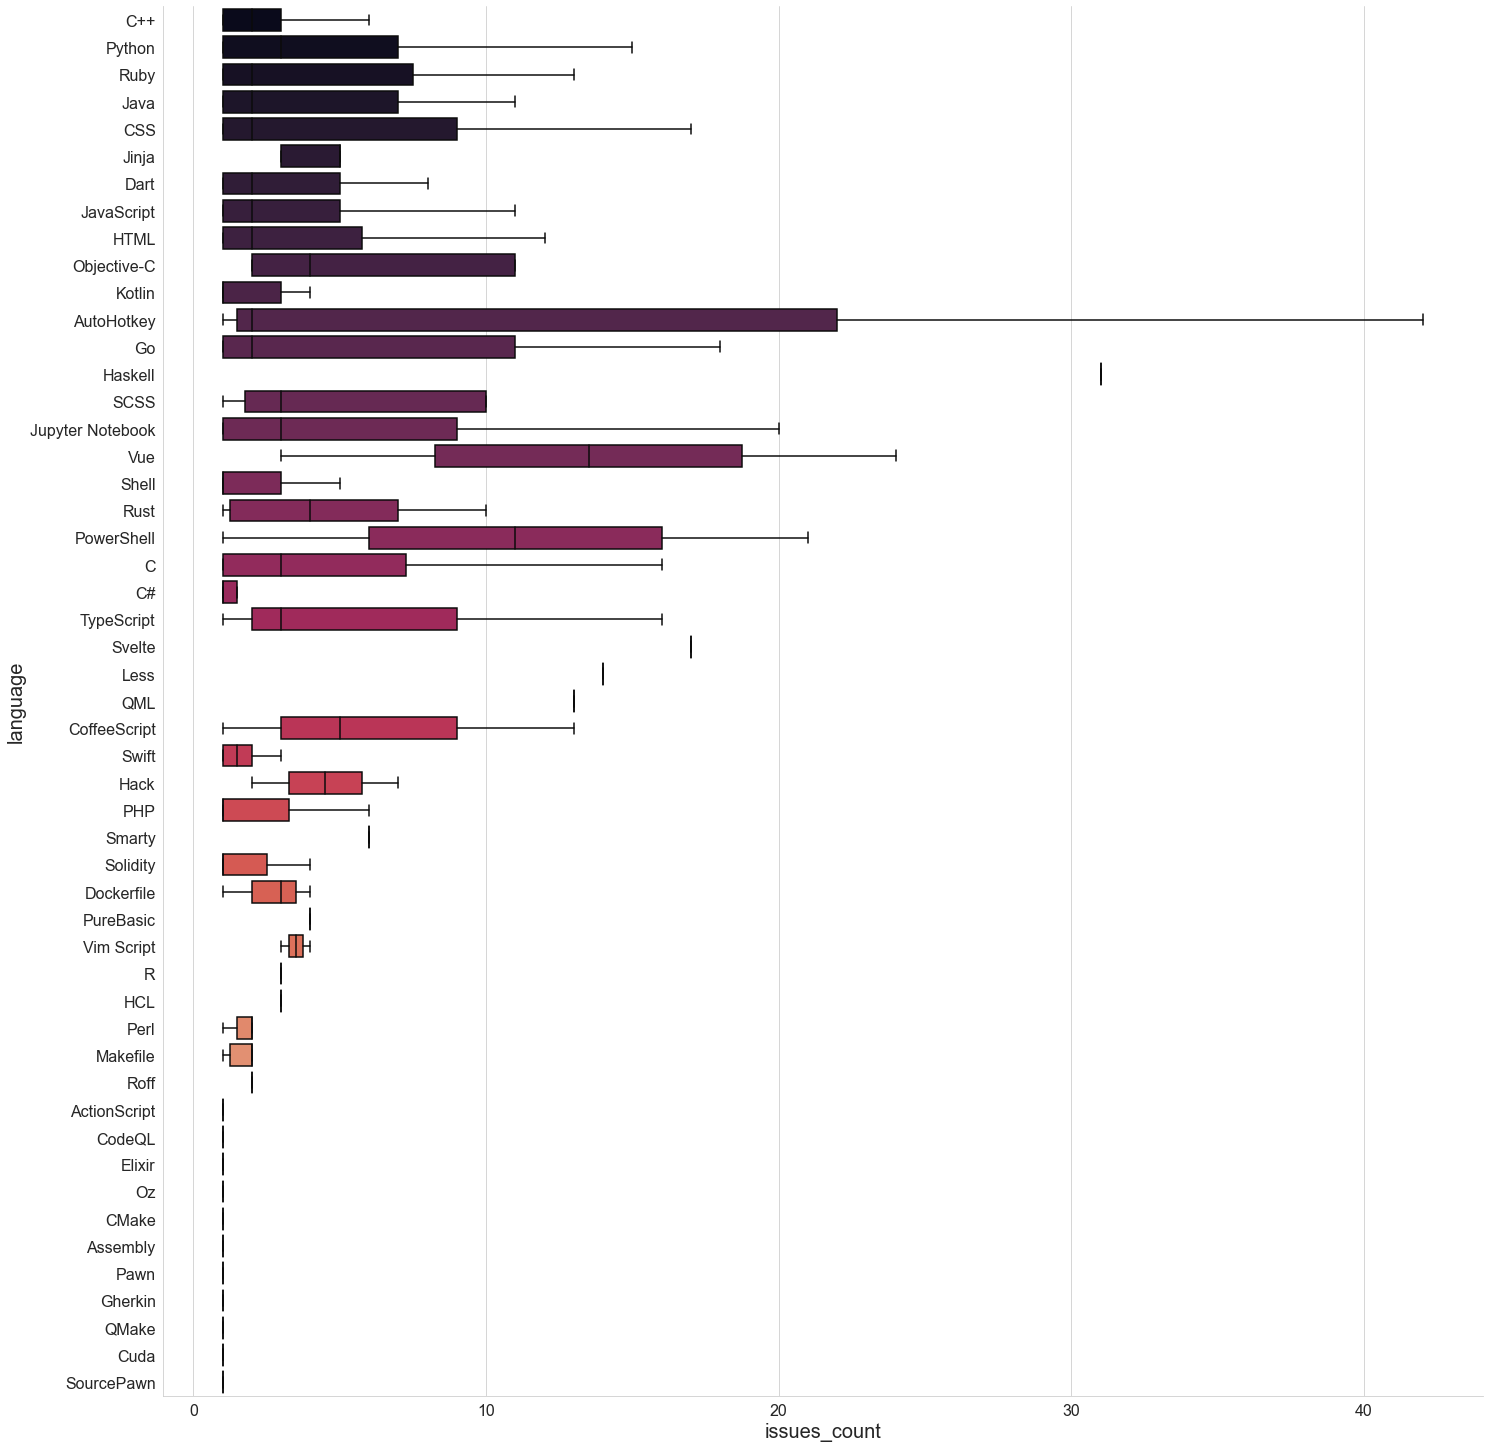

In [50]:
sns.set_style("whitegrid")
issues_count_box = sns.catplot(data=github_data, kind='box', y='language', x='issues_count', height=20, palette='rocket', sym='')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('language', fontsize=20, )
plt.xlabel('issues_count', fontsize=20)
plt.show()

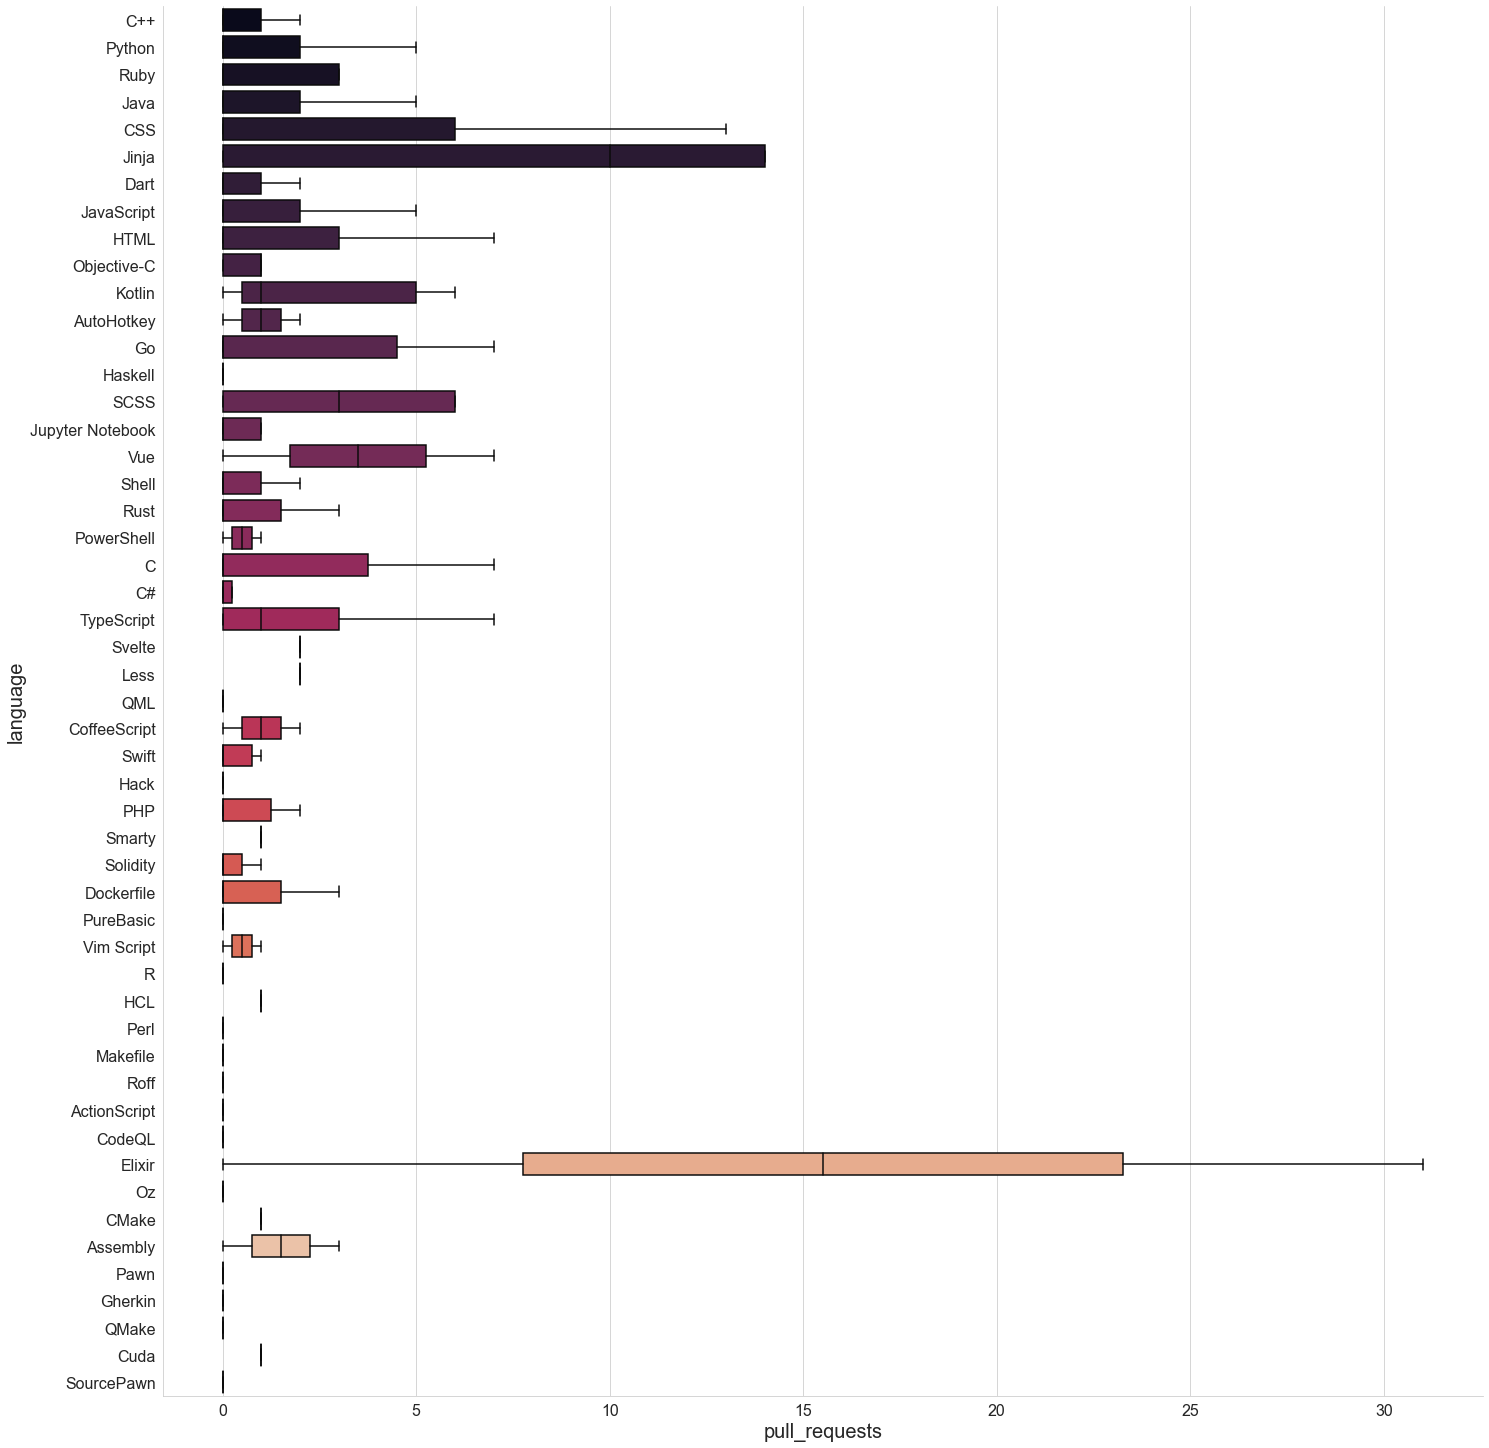

In [51]:
sns.set_style("whitegrid")
pull_requests_box = sns.catplot(data=github_data, kind='box', y='language', x='pull_requests', height=20, palette='rocket', sym='')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('language', fontsize=20, )
plt.xlabel('pull_requests', fontsize=20)
plt.show()

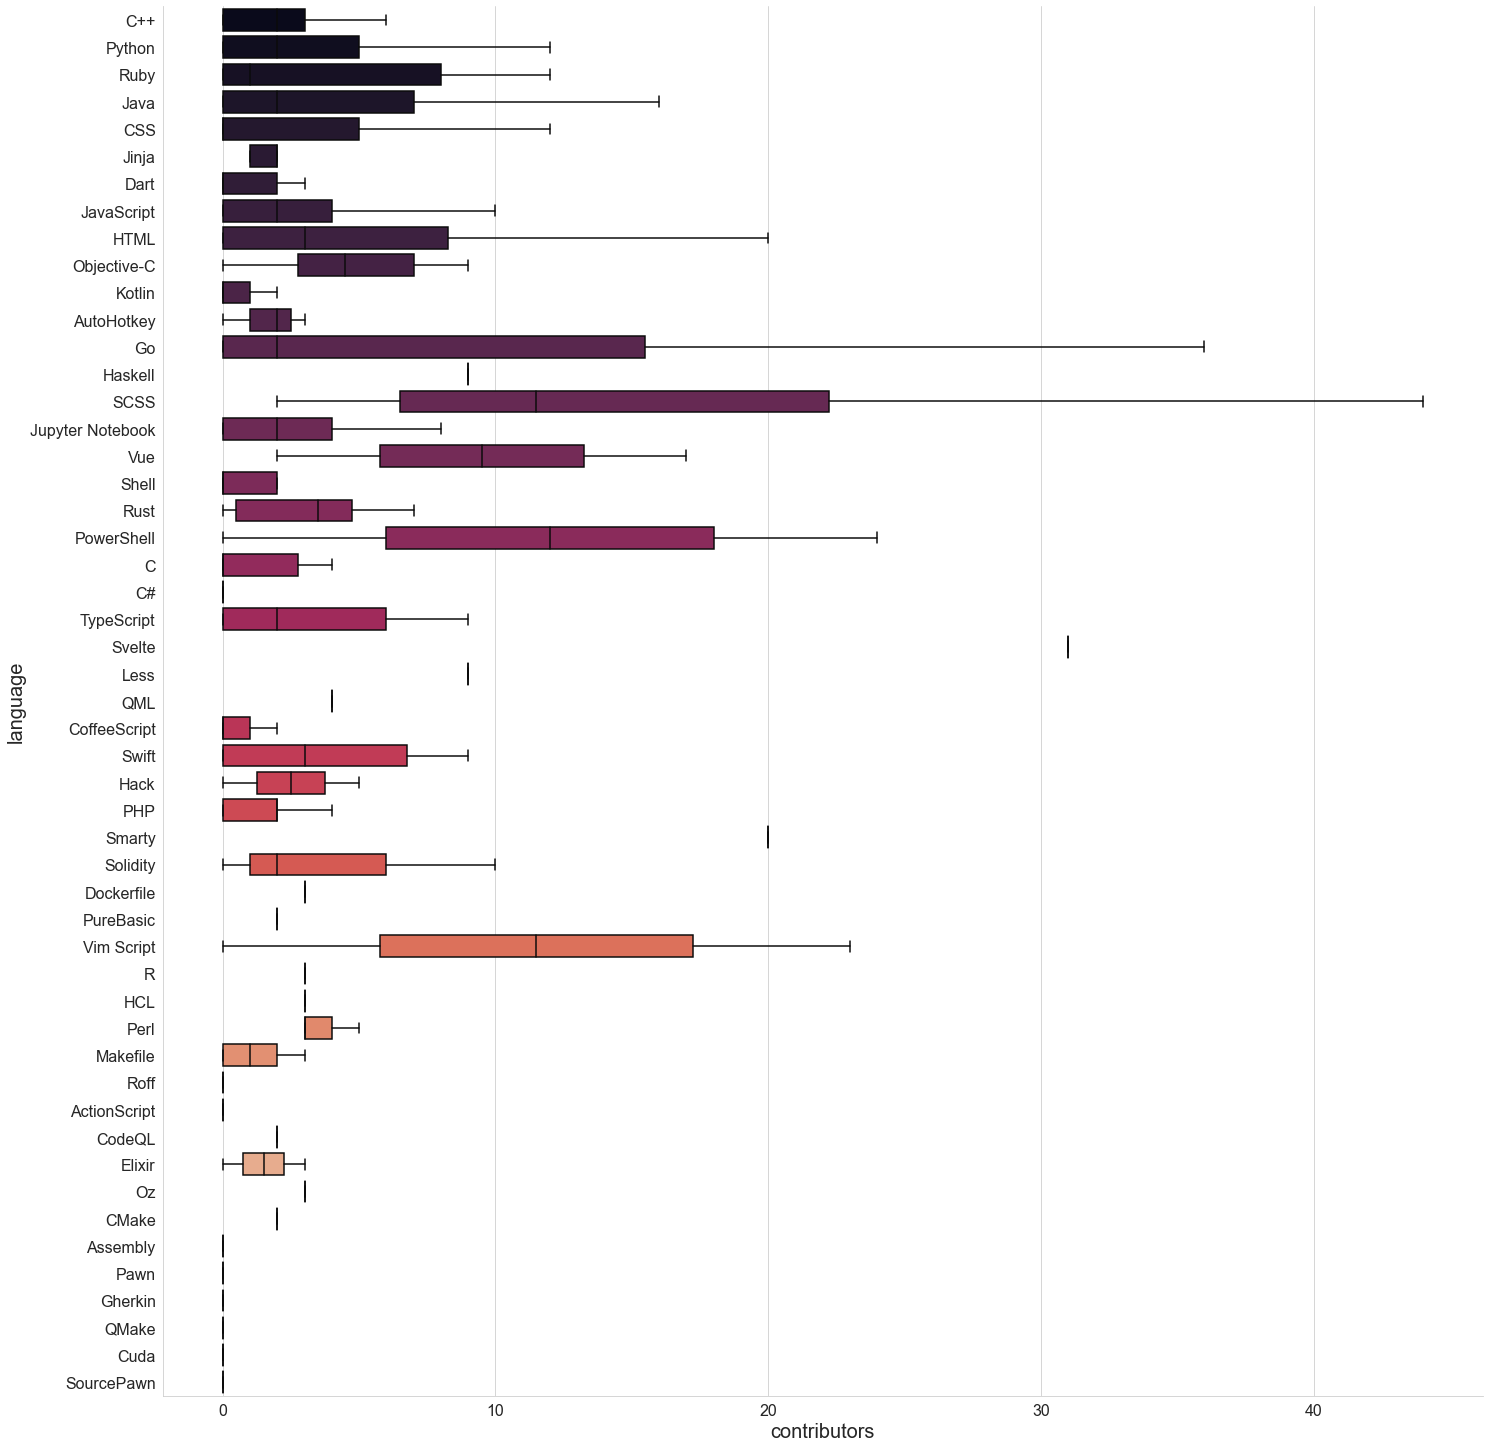

In [52]:
sns.set_style("whitegrid")
contributors_box = sns.catplot(data=github_data, kind='box', y='language', x='contributors', height=20, palette='rocket', sym='')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('language', fontsize=20, )
plt.xlabel('contributors', fontsize=20)
plt.show()

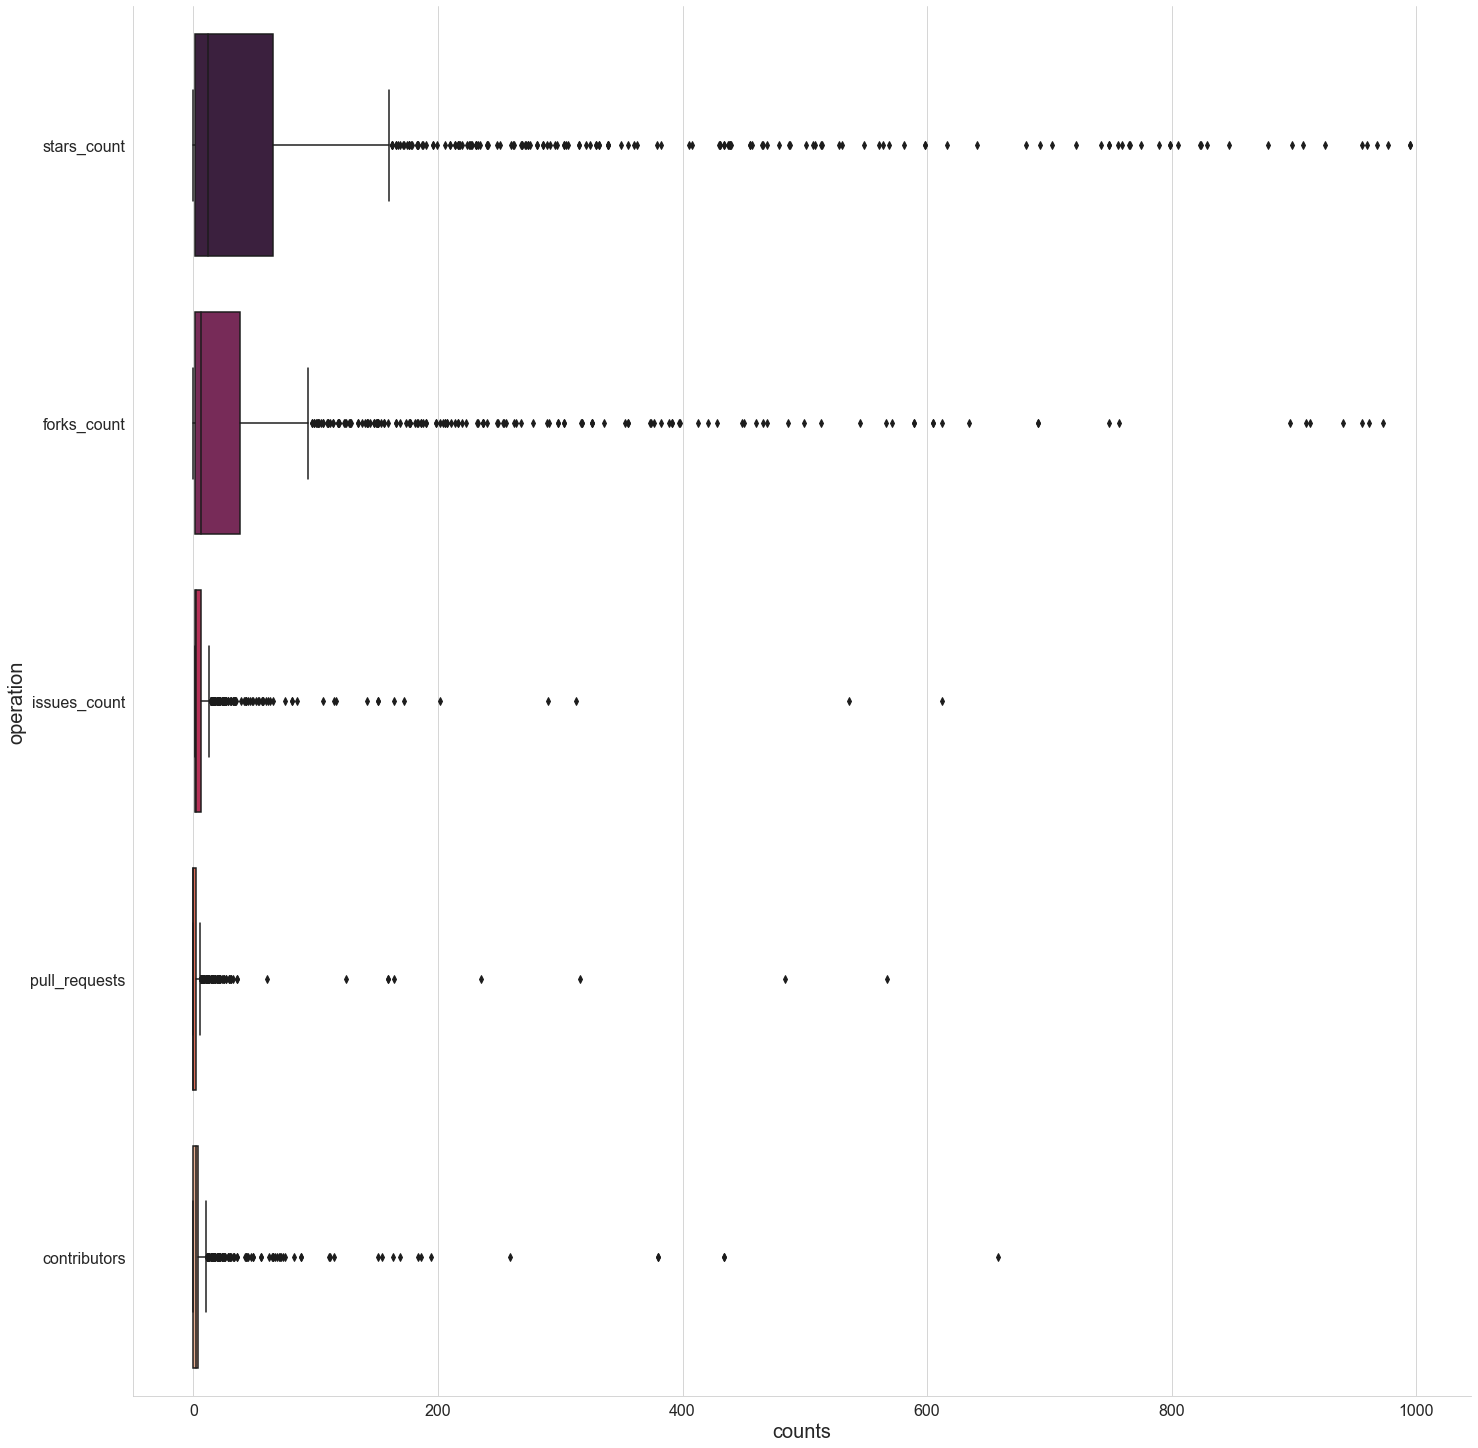

In [116]:
operation_counts = pd.DataFrame(list(github_data['stars_count']), columns=['counts'])
operation_counts = pd.DataFrame(operation_counts, columns=['operation', 'counts'])
operation_counts['operation'] = 'stars_count'

operation_counts = operation_counts.append(pd.DataFrame([['forks_count', c] for c in list(github_data['forks_count'])], columns=['operation', 'counts']), ignore_index=True)
operation_counts = operation_counts.append(pd.DataFrame([['issues_count', c] for c in list(github_data['issues_count'])], columns=['operation', 'counts']), ignore_index=True)
operation_counts = operation_counts.append(pd.DataFrame([['pull_requests', c] for c in list(github_data['pull_requests'])], columns=['operation', 'counts']), ignore_index=True)
operation_counts = operation_counts.append(pd.DataFrame([['contributors', c] for c in list(github_data['contributors'])], columns=['operation', 'counts']), ignore_index=True)

stars_count_box = sns.catplot(data=operation_counts, kind='box', y='operation', x='counts', height=20, palette='rocket')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('operation', fontsize=20)
plt.xlabel('counts', fontsize=20)
plt.show()

## 数据缺失的处理

In [90]:
from numpy import nan as NA
github_data.isnull()

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language
0,False,False,False,False,False,False,True
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1047,False,False,False,False,False,False,False
1048,False,False,False,False,False,False,False
1049,False,False,False,False,False,False,False
1050,False,False,False,False,False,False,False


* 将缺失部分剔除

In [59]:
github_data1 = github_data.dropna()
github_data1

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language
2,ethereum/aleth,0,0,313,27,154,C++
3,localstack/localstack,0,0,290,30,434,Python
4,education/classroom,0,589,202,22,67,Ruby
5,shobhit97/open-gpstracker,0,0,172,0,3,Java
6,donnemartin/system-design-primer,0,0,164,164,115,Python
...,...,...,...,...,...,...,...
1047,Tyriar/canvas-astar.dart,2,1,1,0,0,Dart
1048,ankitkumar70777/github-slideshow,0,0,1,0,8,HTML
1049,aitikgupta/interactive_cpu_scheduler,0,5,1,1,7,Python
1050,gwmccubbin/voting_dapp,11,5,1,0,0,JavaScript


将缺失部分剔除，可以发现，数据从1052行减少到907行。

* 用最高频率值来填补缺失值

In [64]:
language_HF = language_counts.index[-1]
print(language_HF)
github_data2 = github_data.replace(np.nan, language_HF)
github_data2

JavaScript


,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language
0,octocat/Hello-World,0,0,612,316,2,JavaScript
1,EddieHubCommunity/support,271,150,536,6,71,JavaScript
2,ethereum/aleth,0,0,313,27,154,C++
3,localstack/localstack,0,0,290,30,434,Python
4,education/classroom,0,589,202,22,67,Ruby
...,...,...,...,...,...,...,...
1047,Tyriar/canvas-astar.dart,2,1,1,0,0,Dart
1048,ankitkumar70777/github-slideshow,0,0,1,0,8,HTML
1049,aitikgupta/interactive_cpu_scheduler,0,5,1,1,7,Python
1050,gwmccubbin/voting_dapp,11,5,1,0,0,JavaScript


用最高评率值来填补缺失值，可以发现，language数据全部被替换为JavaScript。

* 通过属性的相关关系来填补缺失值

In [88]:
github_data3 = github_data
github_data3

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language
0,octocat/Hello-World,0,0,612,316,2,NaN
1,EddieHubCommunity/support,271,150,536,6,71,NaN
2,ethereum/aleth,0,0,313,27,154,C++
3,localstack/localstack,0,0,290,30,434,Python
4,education/classroom,0,589,202,22,67,Ruby
...,...,...,...,...,...,...,...
1047,Tyriar/canvas-astar.dart,2,1,1,0,0,Dart
1048,ankitkumar70777/github-slideshow,0,0,1,0,8,HTML
1049,aitikgupta/interactive_cpu_scheduler,0,5,1,1,7,Python
1050,gwmccubbin/voting_dapp,11,5,1,0,0,JavaScript


In [96]:
github_data3 = pd.get_dummies(github_data, columns=['language'], dummy_na=True, drop_first=True) # 进行独热编码
correlation_matrix = github_data3.corr()
print(correlation_matrix)

github_data3 = github_data
df1 = github_data3.groupby('language').agg(avg=('stars_count', 'mean'))

for i in range(len(github_data3)):
    if github_data3['language'].iloc[i] is NA:
        rate = github_data3['stars_count'].iloc[i]
        dist = []
        for j in range(len(df1)):
            dist.append(abs(df1.iloc[j]['avg']-rate))
        idx = dist.index(min(dist))
        github_data3['language'].iloc[i] = df1.index[idx]
github_data3['language'].value_counts()

                           stars_count  forks_count  issues_count  \
stars_count                   1.000000     0.250037      0.060943   
forks_count                   0.250037     1.000000      0.123204   
issues_count                  0.060943     0.123204      1.000000   
pull_requests                -0.004548     0.048063      0.324541   
contributors                  0.059866     0.263042      0.382578   
language_Assembly             0.128776     0.020264     -0.007443   
language_AutoHotkey           0.015184     0.001470      0.002436   
language_C                    0.080910     0.045814     -0.010331   
language_C#                  -0.022418    -0.025700     -0.010745   
language_C++                 -0.045119     0.000846      0.023933   
language_CMake               -0.016319    -0.013638     -0.011527   
language_CSS                 -0.038797    -0.046490      0.036892   
language_CodeQL              -0.086614     0.050833      0.083628   
language_CoffeeScript        -0.04

JavaScript          257
Python              155
HTML                 72
Java                 44
CSS                  42
Dart                 38
TypeScript           38
C                    34
CodeQL               33
C++                  33
Jupyter Notebook     29
Ruby                 28
Shell                25
Go                   17
PHP                  17
Perl                 14
ActionScript         12
Rust                 10
Swift                10
Kotlin               10
C#                   10
CoffeeScript          9
Vim Script            9
Objective-C           8
Pawn                  8
SCSS                  7
Gherkin               7
Cuda                  7
SourcePawn            6
Makefile              6
Jinja                 5
QMake                 5
AutoHotkey            5
PureBasic             4
Hack                  4
Assembly              4
QML                   3
CMake                 3
Solidity              3
HCL                   3
Dockerfile            3
PowerShell      

In [114]:
github_data3

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language
0,octocat/Hello-World,0,0,612,316,2,CodeQL
1,EddieHubCommunity/support,271,150,536,6,71,Perl
2,ethereum/aleth,0,0,313,27,154,C++
3,localstack/localstack,0,0,290,30,434,Python
4,education/classroom,0,589,202,22,67,Ruby
...,...,...,...,...,...,...,...
1047,Tyriar/canvas-astar.dart,2,1,1,0,0,Dart
1048,ankitkumar70777/github-slideshow,0,0,1,0,8,HTML
1049,aitikgupta/interactive_cpu_scheduler,0,5,1,1,7,Python
1050,gwmccubbin/voting_dapp,11,5,1,0,0,JavaScript


* 通过数据对象之间的相似性来填补缺失值

In [115]:
github_data3['language'].value_counts()

JavaScript          257
Python              155
HTML                 72
Java                 44
CSS                  42
Dart                 38
TypeScript           38
C                    34
CodeQL               33
C++                  33
Jupyter Notebook     29
Ruby                 28
Shell                25
Go                   17
PHP                  17
Perl                 14
ActionScript         12
Rust                 10
Swift                10
Kotlin               10
C#                   10
CoffeeScript          9
Vim Script            9
Objective-C           8
Pawn                  8
SCSS                  7
Gherkin               7
Cuda                  7
SourcePawn            6
Makefile              6
Jinja                 5
QMake                 5
AutoHotkey            5
PureBasic             4
Hack                  4
Assembly              4
QML                   3
CMake                 3
Solidity              3
HCL                   3
Dockerfile            3
PowerShell      

In [107]:
github_data4 = github_data

In [108]:
def regularit(df):
    new_df = pd.DataFrame(index=df.index)
    columns = ['stars_count', 'forks_count', 'issues_count', 'pull_requests', 'contributors']
    for c in columns:
        d = df[c]
        MAX = d.max()
        MIN = d.min()
        new_df[c] = ((d - MIN) / (d - MAX))
    return new_df
github_data5 = regularit(github_data4)
github_data5

,stars_count,forks_count,issues_count,pull_requests,contributors
0,-0.000000,-0.000000,inf,-1.258964,-0.003049
1,-0.374309,-0.182260,-7.039474,-0.010695,-0.120954
2,-0.000000,-0.000000,-1.043478,-0.050000,-0.305556
3,-0.000000,-0.000000,-0.897516,-0.055866,-1.937500
4,-0.000000,-1.533854,-0.490244,-0.040367,-0.113367
...,...,...,...,...,...
1047,-0.002014,-0.001029,-0.000000,-0.000000,-0.000000
1048,-0.000000,-0.000000,-0.000000,-0.000000,-0.012308
1049,-0.000000,-0.005165,-0.000000,-0.001767,-0.010753
1050,-0.011179,-0.005165,-0.000000,-0.000000,-0.000000


In [109]:
language = pd.concat([github_data5, github_data4['language']], axis=1)
language

,stars_count,forks_count,issues_count,pull_requests,contributors,language
0,-0.000000,-0.000000,inf,-1.258964,-0.003049,CodeQL
1,-0.374309,-0.182260,-7.039474,-0.010695,-0.120954,Perl
2,-0.000000,-0.000000,-1.043478,-0.050000,-0.305556,C++
3,-0.000000,-0.000000,-0.897516,-0.055866,-1.937500,Python
4,-0.000000,-1.533854,-0.490244,-0.040367,-0.113367,Ruby
...,...,...,...,...,...,...
1047,-0.002014,-0.001029,-0.000000,-0.000000,-0.000000,Dart
1048,-0.000000,-0.000000,-0.000000,-0.000000,-0.012308,HTML
1049,-0.000000,-0.005165,-0.000000,-0.001767,-0.010753,Python
1050,-0.011179,-0.005165,-0.000000,-0.000000,-0.000000,JavaScript


In [112]:
for i in range(len(language)):
    if pd.isna(language['language'].iloc[i]):
        dists = []
        for j in range(len(rates)):  # corrected range usage
            dist = np.sqrt(np.sum(np.square(infos[i] - infos[j])))
            dists.append(dist)
        idx = dists.index(min(dists))
        github_data4.at[i, 'language'] = github_data4.at[idx, 'language']

github_data4['language'].value_counts()

JavaScript          257
Python              155
HTML                 72
Java                 44
CSS                  42
Dart                 38
TypeScript           38
C                    34
CodeQL               33
C++                  33
Jupyter Notebook     29
Ruby                 28
Shell                25
Go                   17
PHP                  17
Perl                 14
ActionScript         12
Rust                 10
Swift                10
Kotlin               10
C#                   10
CoffeeScript          9
Vim Script            9
Objective-C           8
Pawn                  8
SCSS                  7
Gherkin               7
Cuda                  7
SourcePawn            6
Makefile              6
Jinja                 5
QMake                 5
AutoHotkey            5
PureBasic             4
Hack                  4
Assembly              4
QML                   3
CMake                 3
Solidity              3
HCL                   3
Dockerfile            3
PowerShell      

这个方法和之前的数据相差不大，由于在这个数据集中用的计数属性是高度相关的，所以区别不大。